# ÖDEV-7
Öğrenci Adı/Soyadı: **Arda Tan Göker**  
Öğrenci No: **1801022042**
***

## Ön Hazırlık:
### Ödev7_Ornek2.pdf

In [1]:
# As usual, we begin with importing necessary libraries and functions
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

# WE NEED TO IMPORT THE CUSTOM (USER DEFINED) FUNCTION AS WELL, IN ORDER TO USE IT!!!
import SystemFunction

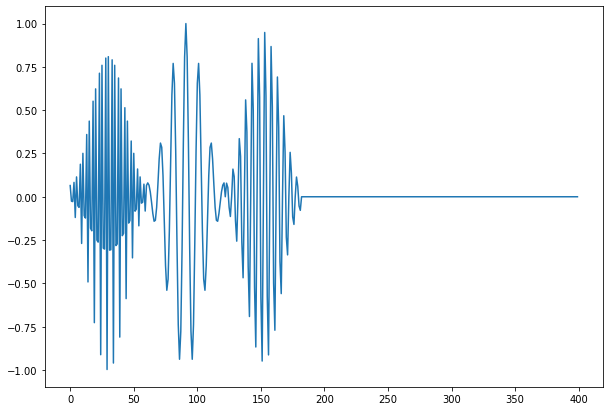

In [2]:
# Generate the individual components and the input signal
N = 400 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency components)
n = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M) # window function (Hamming window)

# the components
x1 = wn*np.cos(0.2*np.pi*n) # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2) # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5) # component with w1 = 0.8*pi frequency

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)

plt.figure()
plt.plot(xn)

In [3]:
# Calculate the Fourier transform of xn
w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

Text(0.5, 0, 'frekans x$\\pi$ rad/sample')

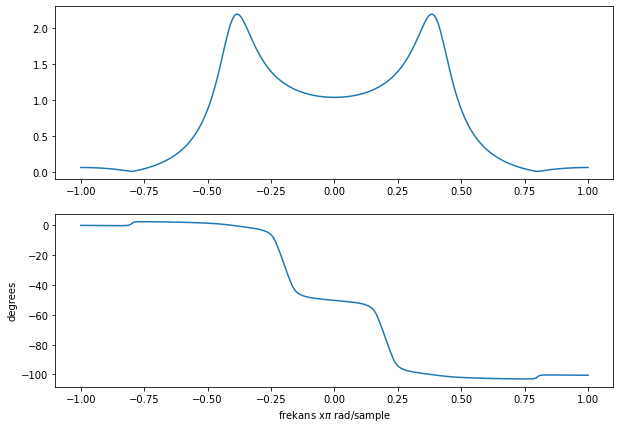

In [4]:
Hw, polezz, zerozz, K = SystemFunction.SystemFunction(w)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frekans x$\pi$ rad/sample')

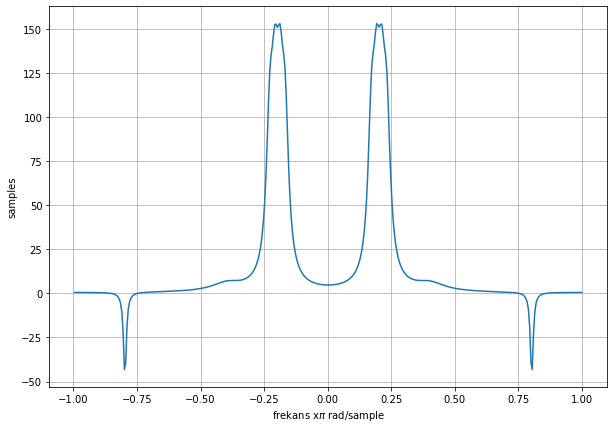

In [5]:
# calculate the group delay of the system:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frekans x$\pi$ rad/sample')
plt.grid()
plt.show()

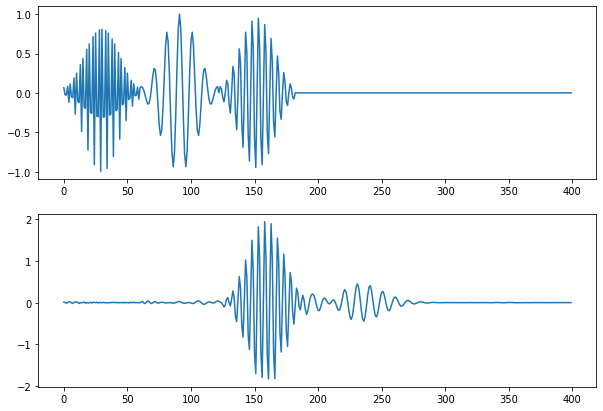

In [6]:
Yw_shifted = Hw * Xw_shifted # we multiply the frequency response of the system with the **shifted** Fourier transform of the signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take the real component (because of numerical consistency)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)

***
### Ödev7_Ornek3.pdf

In [7]:
# As usual, we begin with importing necessary libraries and functions
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

([<matplotlib.lines.Line2D at 0x1a46296d460>],
 Text(0, 0.5, 'phase (rad)'),
 Text(0.5, 0, 'frequency rad/sample'))

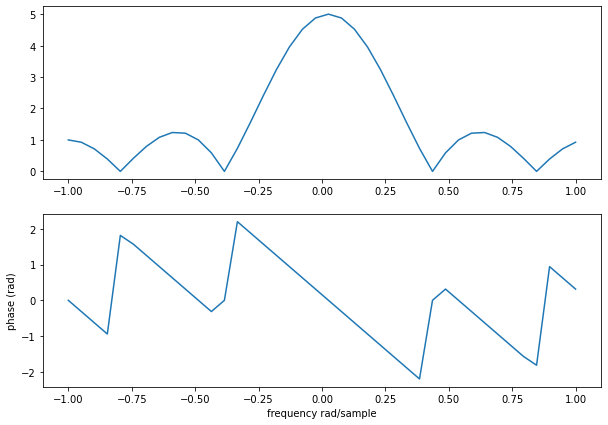

In [8]:
N = 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn, N))

w = np.linspace(-np.pi, np.pi, N)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('phase (rad)'), plt.xlabel('frequency rad/sample')

Text(0, 0.5, 'group delay (samples)')

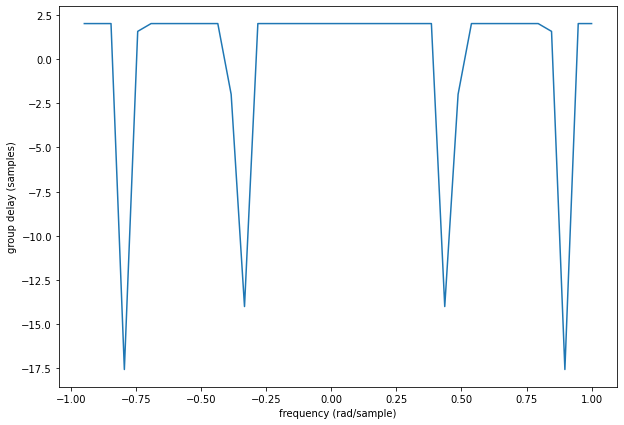

In [9]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

In [10]:
n = np.arange(0, N, 1) # first create the index vector at N points
w0 = 0.1*np.pi # frequency of the input signal
xn = np.cos(w0*n) # create the input signal at w0

Xw = np.fft.fftshift(fft(xn, N)) # compute the frequency response (in the [-pi pi] interval)

Yw_shifted = Hw * Xw # compute the fft of the output signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw))

(<StemContainer object of 3 artists>, None)

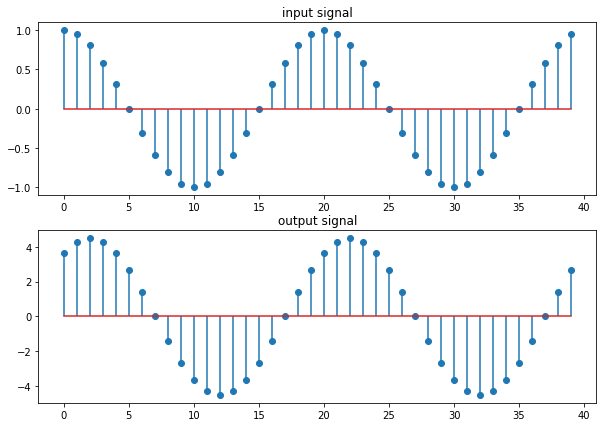

In [11]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n, xn), ax1.title.set_text('input signal')
ax2.stem(n, yn), ax2.title.set_text('output signal')

***
### Ödev7_Ornek4.pdf

In [12]:
# As usual, we begin with importing necessary libraries and functions
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

# to read .csv data file
from scipy.io import loadmat

In [13]:
# importing an IIR filter
filter_data = loadmat('butterworth.mat') # load the filter obtained from pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and convert them to float (from string)

b = Coeffs[:,0] # first column is b
a = Coeffs[:,1] # second column is a (only if the filter is IIR)

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

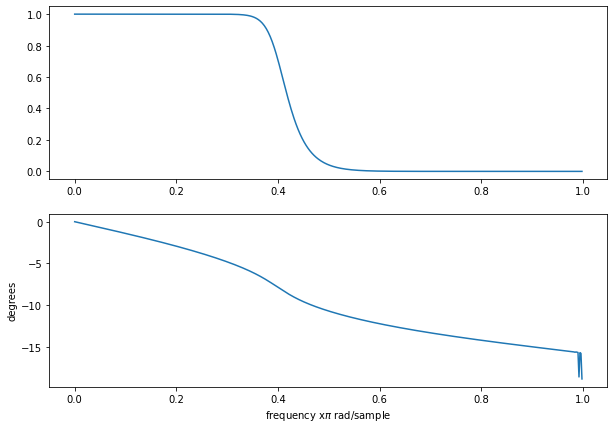

In [14]:
w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

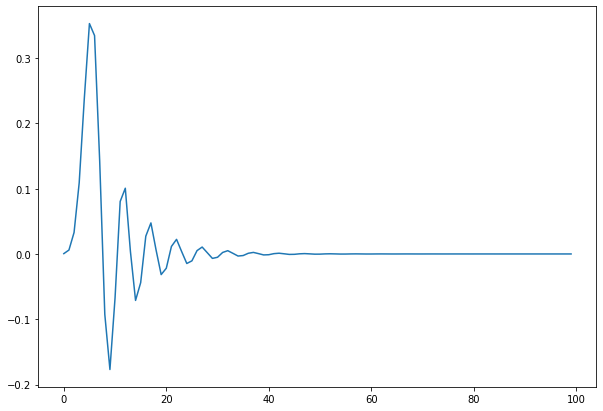

In [15]:
n, hn = sgnl.dimpulse((b,a,1), n=100) # compute the impulse response for 100 points
plt.figure()
plt.plot(n, np.squeeze(hn))

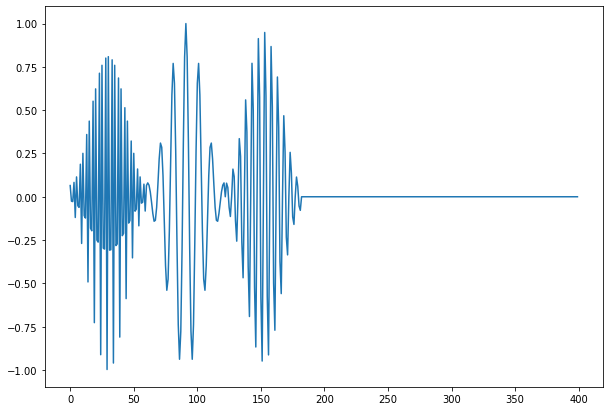

In [16]:
# Generate the individual components and the input signal
N = 400 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency components)
n1 = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n1/M) # window function (Hamming window)

# the components
x1 = wn*np.cos(0.2*np.pi*n1) # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n1 - np.pi/2) # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n1 - np.pi/5) # component with w1 = 0.8*pi frequency

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n1))), axis=None)

plt.figure()
plt.plot(xn)

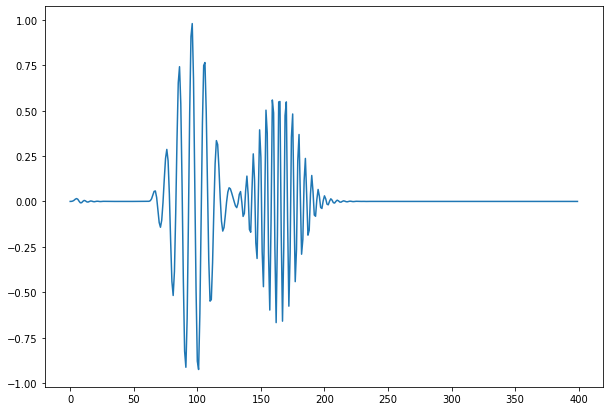

In [17]:
yn = sgnl.lfilter(b, a, xn) # using the coefficients, we applied the signal to the input of the filter.

plt.figure()
plt.plot(yn)

***

## Ödev soruları:
### SORU-1
**`Tip-1`**

Text(0, 0.5, 'group delay (örnek)')

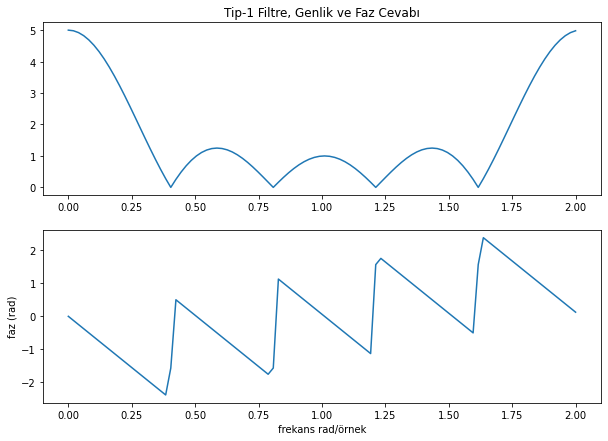

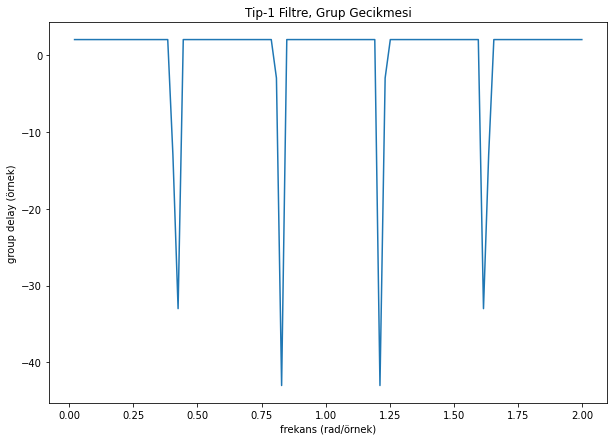

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

N = 100 # bu satır bütün diğer filtrelerde ortak olduğu için alttaki kod bloklarında tekrar yazılmadı 
hn_t1 = [1, 1, 1, 1, 1]
Hw_t1 = fft(hn_t1, N)

w = np.linspace(0, 2*np.pi, N) # bu satır bütün diğer filtrelerde ortak olduğu için alttaki kod bloklarında tekrar yazılmadı 
Hw_t1_mag = np.abs(Hw_t1)
Hw_t1_phs = np.unwrap(np.angle(Hw_t1))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_t1_mag), ax1.title.set_text('Tip-1 Filtre, Genlik ve Faz Cevabı')
ax2.plot(w/np.pi, Hw_t1_phs), plt.ylabel('faz (rad)')
plt.xlabel('frekans rad/örnek')

tau_w_t1 = -np.diff(Hw_t1_phs)*(N/(2*np.pi))
plt.figure()
plt.title("Tip-1 Filtre, Grup Gecikmesi")
plt.plot(w[1::]/np.pi, tau_w_t1)
plt.xlabel('frekans (rad/örnek)')
plt.ylabel('group delay (örnek)')

Filtre genlik grafiğinden görüldüğü üzere sadece alçak frekansları eçirdiğinden, bir alçak geçiren filtredir.

Ripple lar arasında da fazın lineer olduğunu gözlemleyebiliyoruz. Bu yüzden grup gecikmesi de sabittir, üçüncü grafikte görüldüğü üzere bu değer 2 çıkmıştır.

**`Tip-2`**

Text(0, 0.5, 'group delay (örnek)')

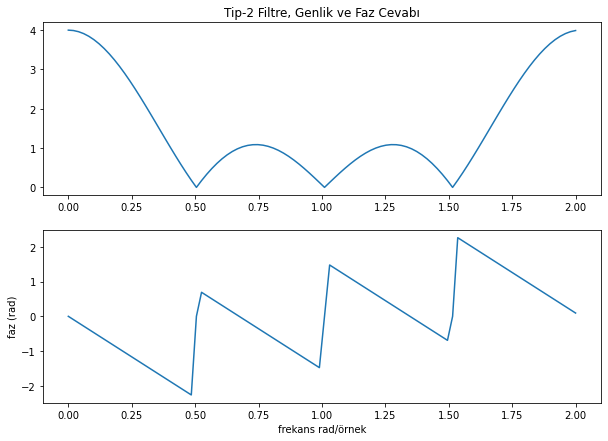

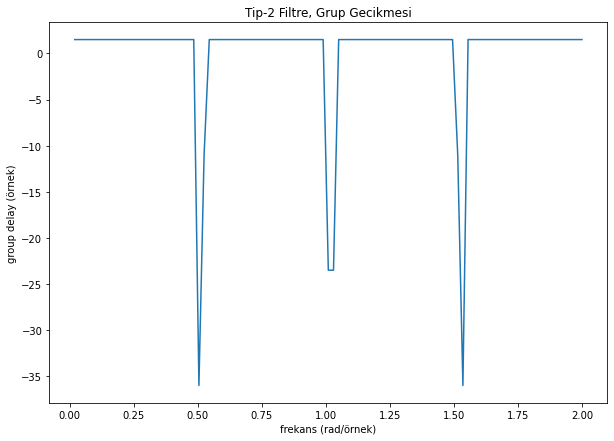

In [19]:
hn_t2 = [1, 1, 1, 1]
Hw_t2 = fft(hn_t2, N)

Hw_t2_mag = np.abs(Hw_t2)
Hw_t2_phs = np.unwrap(np.angle(Hw_t2))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_t2_mag), ax1.title.set_text('Tip-2 Filtre, Genlik ve Faz Cevabı')
ax2.plot(w/np.pi, Hw_t2_phs), plt.ylabel('faz (rad)')
plt.xlabel('frekans rad/örnek')

tau_w_t2 = -np.diff(Hw_t2_phs)*(N/(2*np.pi))
plt.figure()
plt.title("Tip-2 Filtre, Grup Gecikmesi")
plt.plot(w[1::]/np.pi, tau_w_t2)
plt.xlabel('frekans (rad/örnek)')
plt.ylabel('group delay (örnek)')

Filtre genlik grafiğinden görüldüğü üzere sadece alçak frekansları eçirdiğinden, bir alçak geçiren filtredir. Fakat görüldüğü üzere bir önceki filtreye kıyasla daha az ripple vardır, bunun sebebi de daha düşük olan N sayısıdır.

Ripple lar arasında da fazın lineer olduğunu gözlemleyebiliyoruz. Bu yüzden grup gecikmesi de sabittir, üçüncü grafikte görüldüğü üzere bu değer 2 çıkmıştır.

**`Tip-3`**

Text(0, 0.5, 'group delay (örnek)')

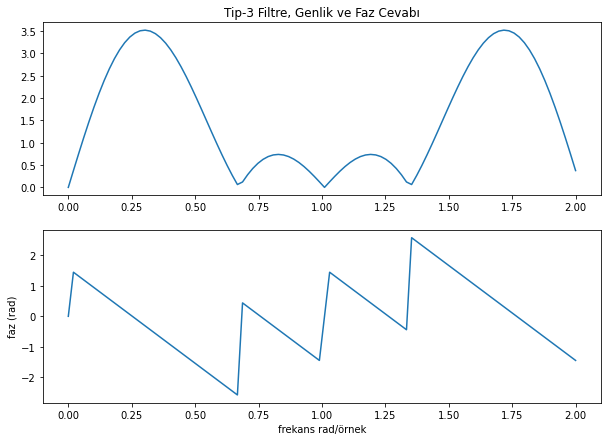

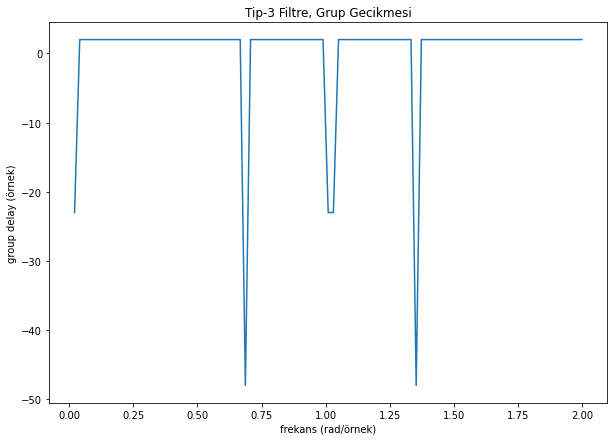

In [20]:
hn_t3 = [1, 1, 0, -1, -1]
Hw_t3 = fft(hn_t3, N)

Hw_t3_mag = np.abs(Hw_t3)
Hw_t3_phs = np.unwrap(np.angle(Hw_t3))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_t3_mag), ax1.title.set_text('Tip-3 Filtre, Genlik ve Faz Cevabı')
ax2.plot(w/np.pi, Hw_t3_phs), plt.ylabel('faz (rad)')
plt.xlabel('frekans rad/örnek')

tau_w_t3 = -np.diff(Hw_t3_phs)*(N/(2*np.pi))
plt.figure()
plt.title("Tip-3 Filtre, Grup Gecikmesi")
plt.plot(w[1::]/np.pi, tau_w_t3)
plt.xlabel('frekans (rad/örnek)')
plt.ylabel('group delay (örnek)')

Filtre genlik grafiğinden görüldüğü üzere belirli bir aralıktaki frekansları geçirdiğinden, bir bant geçiren filtredir.

Ripple lar arasında da fazın lineer olduğunu gözlemleyebiliyoruz. Bu yüzden grup gecikmesi de sabittir, üçüncü grafikte görüldüğü üzere bu değer 2 çıkmıştır.

**`Tip-4`**

Text(0, 0.5, 'group delay (örnek)')

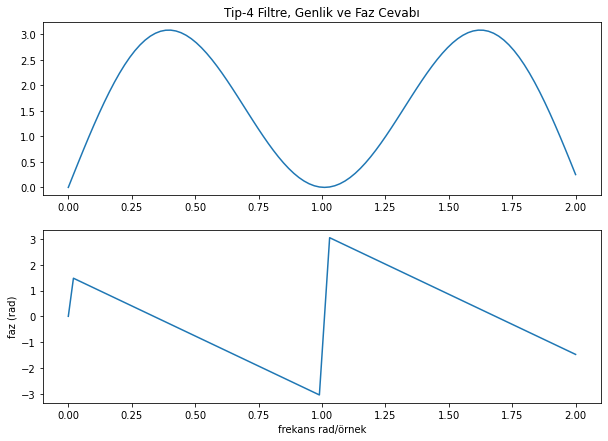

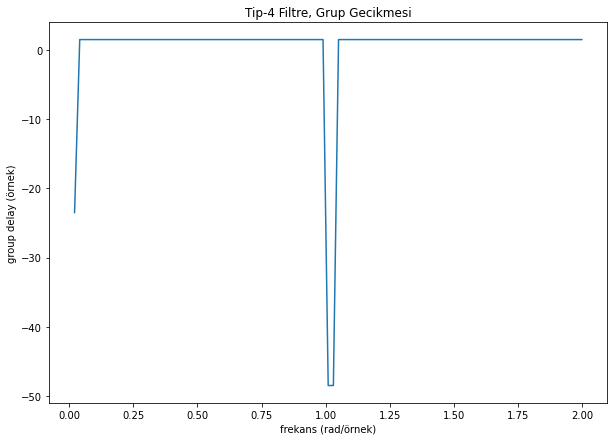

In [21]:
hn_t4 = [1, 1, -1, -1]
Hw_t4 = fft(hn_t4, N)

Hw_t4_mag = np.abs(Hw_t4)
Hw_t4_phs = np.unwrap(np.angle(Hw_t4))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_t4_mag), ax1.title.set_text('Tip-4 Filtre, Genlik ve Faz Cevabı')
ax2.plot(w/np.pi, Hw_t4_phs), plt.ylabel('faz (rad)')
plt.xlabel('frekans rad/örnek')

tau_w_t4 = -np.diff(Hw_t4_phs)*(N/(2*np.pi))
plt.figure()
plt.title("Tip-4 Filtre, Grup Gecikmesi")
plt.plot(w[1::]/np.pi, tau_w_t4)
plt.xlabel('frekans (rad/örnek)')
plt.ylabel('group delay (örnek)')

Filtre genlik grafiğinden görüldüğü üzere belirli bir aralıktaki frekansları geçirdiğinden, bir bant geçiren filtredir. Fakat görüldüğü üzere bir önceki filtreye kıyasla daha az ripple vardır, bunun sebebi de daha düşük olan N sayısıdır.

Ripple lar arasında da fazın lineer olduğunu gözlemleyebiliyoruz. Bu yüzden grup gecikmesi de sabittir, üçüncü grafikte görüldüğü üzere bu değer 2 çıkmıştır.

***
### SORU-2
**`FIR - Bant Geçiren`**  
Barthann, N = 30

C:\Users\longa\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\signal\filter_design.py:474: RuntimeWarning: divide by zero encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /


Text(0.5, 0, 'frekans x$\\pi$ rad/örnek')

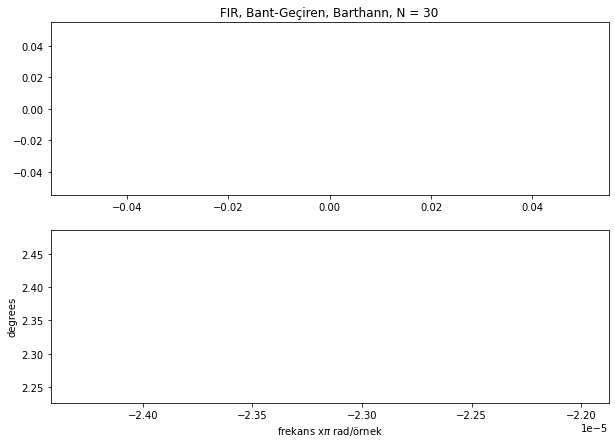

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
from scipy.io import loadmat
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

filter_data = loadmat('FIR_BP.mat') 

fir_bp_data = filter_data['zpk'].astype(complex)

p2B = fir_bp_data[0]
z2B = fir_bp_data[1]

w, Hw_bp1 = sgnl.freqz(p2B, z2B, -7.272221281067399*10**(-5)) 
# en son parametre, pyfda içindeki k değeridir

Hw_bp1_mag = abs(Hw_bp1)
Hw_bp1_phs = np.unwrap(np.angle(Hw_bp1))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_bp1_mag), ax1.title.set_text('FIR, Bant-Geçiren, Barthann, N = 30')
ax2.plot(w/np.pi, Hw_bp1_phs), plt.ylabel('degrees')
plt.xlabel('frekans x$\pi$ rad/örnek')


***
### SORU-3
**`IIR - Yüksek Geçiren`**  
Chebyshev, N = 13

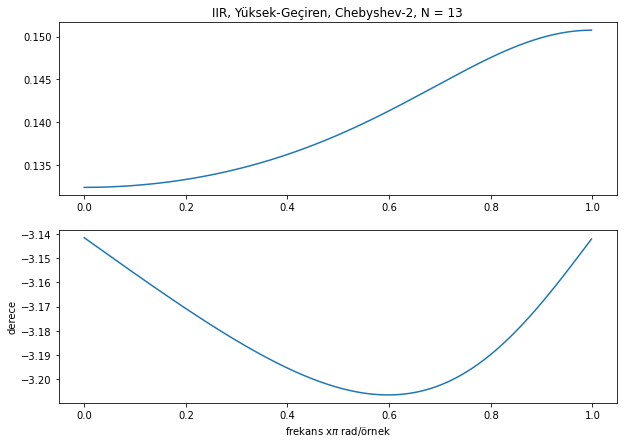

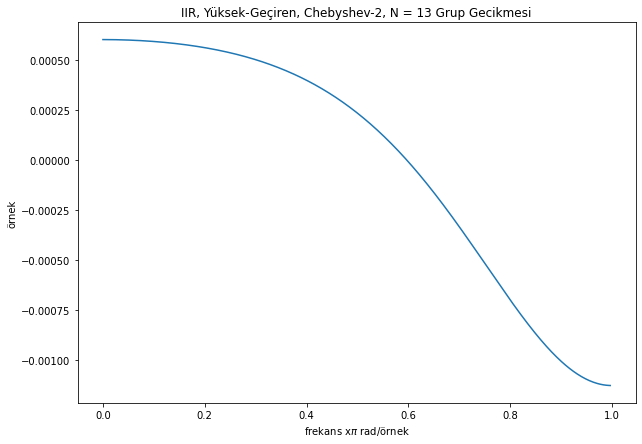

In [23]:
filter_data = loadmat('IIR_HP.mat')
Coeffs = filter_data['ba'].astype(np.float)

b_hp = Coeffs[:,0] # first column is b
a_hp = Coeffs[:,1] # second column is a

w, Hw = sgnl.freqz(b_hp, a_hp)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag), ax1.title.set_text('IIR, Yüksek-Geçiren, Chebyshev-2, N = 13')
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('derece')
plt.xlabel('frekans x$\pi$ rad/örnek')

N = 13
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
# grup gecikmesinin hesaplanması

plt.figure()
plt.plot(w[:-1]/np.pi, np.unwrap(tau_w))
plt.title('IIR, Yüksek-Geçiren, Chebyshev-2, N = 13 Grup Gecikmesi')
plt.ylabel('örnek')
plt.xlabel('frekans x$\pi$ rad/örnek')
plt.show()

**`IIR - Alçak Geçiren`**  
Butterworth, N = 11

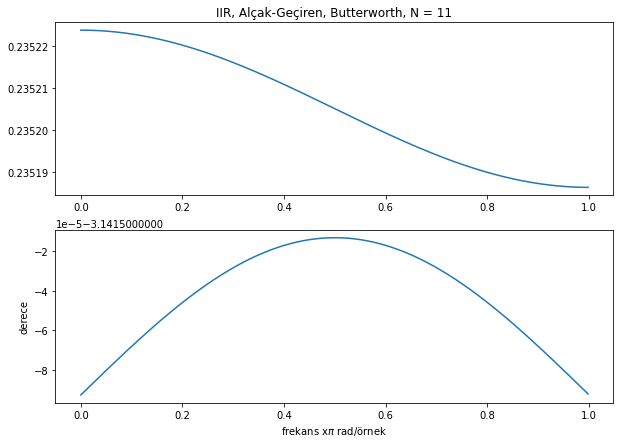

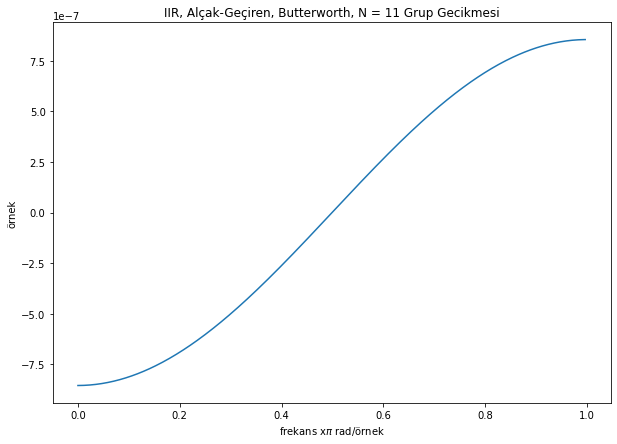

In [24]:
filter_data = loadmat('IIR_LP.mat')
Coeffs = filter_data['ba'].astype(np.float)

b_lp = Coeffs[:,0] # first column is b
a_lp = Coeffs[:,1] # second column is a

w, Hw = sgnl.freqz(b_lp, a_lp)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag), ax1.title.set_text('IIR, Alçak-Geçiren, Butterworth, N = 11')
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('derece')
plt.xlabel('frekans x$\pi$ rad/örnek')

N = 11
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
# grup gecikmesinin hesaplanması

plt.figure()
plt.plot(w[:-1]/np.pi, np.unwrap(tau_w))
plt.title('IIR, Alçak-Geçiren, Butterworth, N = 11 Grup Gecikmesi')
plt.ylabel('örnek')
plt.xlabel('frekans x$\pi$ rad/örnek')
plt.show()